### Introduction to Canonical Correlation Analysis (CCA) in Python


###### https://cmdlinetips.com/2020/12/canonical-correlation-analysis-in-python/


Increasingly, we have multiple high dimensional datasets from from the same samples. Canonical Correlation Analysis aka CCA is great for scenarios where you two high dimensional datasets from the same samples and it enables learning looking at the datasets simultaneously. A classic example is audio and video datasets from the same individuals. One can also think of CCA is another dimensionality reduction technique like Principal Component Analysis. Unlike PCA, you deal with two datasets in CCA instead of one.

If you are interested in a bit of history CCA is originally developed by the same Hotelling who developed PCA in the 1930s.
What is Canonical Correlation Analysis?

In this tutorial, we will see examples of how to perform CCA using Palmer Penguins data set. We will use scikit-learn to perform Canonical Correlation Analysis (CCA). We will not go into the math behind CCA, instead we will see a practical example of doing CCA and understand the main intuition behind the results.

As we explained in the previous post on performing CCA with R, one can understand the idea behind CCA as follows：


“Let us say, there is one or more variables generating two high-dimensional data sets X and Y. Here, the data sets X and Y are observables. And we don’t know about the latent variable(s) behind the two data sets. Since both the datasets are from the latent variable, there will be a lot shared or common variation in the two datasets. By doing CCA, we can identify the common variation, the canonical variates that are highly correlated to the unknown latent variable. ”

Typically, the two datasets might have other variation in addition to the variation due to the main latent variable. And, CCA helps us remove the data specific variation or noise in the two datasets and gets to the canonical variable that captures the hidden variable.
Palmer Penguin Dataset for Canonical Correlation Analysis

To get started, let us load Pandas, Matplotlib, numpy, and Seaborn.



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Let us load Palmer Penguin datasets and do a a bit bit of cleanup by removing any rows with missing values.
link2data = "/Users/sagawithme/Documents/GitHub/selfstudy/input/penguins.csv"
df = pd.read_csv(link2data)
df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


#### Since Canonical Correlation Analysis involve two high dimensional data set sets, we will split the Penguin’s data into two datasets X and Y. 



In [5]:
# The dataset X has two variables corresponding to bill length and depth.

X = df[['bill_length_mm','bill_depth_mm']]
X.head()

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6


In [6]:
#  Standardize the variables by subtracting with mean and dividing by standard deviation.

X_mc = (X - X.mean())/(X.std())
X_mc.head()

,bill_length_mm,bill_depth_mm
0,-0.894695,0.779559
1,-0.821552,0.119404
2,-0.675264,0.424091
4,-1.333559,1.084246
5,-0.858123,1.744400


In [7]:
# Similarly,The second dataset Y contains flipper length and body weight.
Y = df[['flipper_length_mm', 'body_mass_g']]
# Y.head()
#Standardize the Y data set as well.

Y_mc = (Y-Y.mean())/(Y.std())
# Y_mc.head()

here we nee dto introduce the functions from books:

For the random vectors $\mathbf{X}^{(1)}$ and $\mathbf{X}^{(2)}$, let
$$
\begin{array}{c}
E\left(\mathbf{X}^{(1)}\right)=\boldsymbol{\mu}^{(1)} ; \quad \operatorname{Cov}\left(\mathbf{X}^{(1)}\right)=\boldsymbol{\Sigma}_{11} \\
E\left(\mathbf{X}^{(2)}\right)=\boldsymbol{\mu}^{(2)} ; \quad \operatorname{Cov}\left(\mathbf{X}^{(2)}\right)=\mathbf{\Sigma}_{22} \\
\operatorname{Cov}\left(\mathbf{X}^{(1)}, \mathbf{X}^{(2)}\right)=\boldsymbol{\Sigma}_{12}=\mathbf{\Sigma}_{21}^{\prime}
\end{array}
$$

It will be convenient to consider $\mathbf{X}^{(1)}$ and $\mathbf{X}^{(2)}$ jointly, so, using results through $(2-40)$ and $(10-1)$, we find that the random vector
$$
\underset{((p+q) \times 1)}{\mathbf{X}}=\left[\begin{array}{c}
\mathbf{X}^{(1)} \\
\mathbf{X}^{(2)}
\end{array}\right]=\left[\begin{array}{c}
\boldsymbol{X}_{1}^{(1)} \\
\boldsymbol{X}_{2}^{(1)} \\
\vdots \\
X_{p}^{(1)} \\
{X}_{1}^{(2)} \\
\boldsymbol{X}_{2}^{(2)} \\
\vdots \\
X_{q}^{(2)}
\end{array}\right]
$$

has mean vector
$$
\underset{((p+q) \times 1)}{\mu}=E(\mathbf{X})=\left[\frac{E\left(\mathbf{X}^{(1)}\right)}{E\left(\mathbf{X}^{(2)}\right)}\right]=\left[\frac{\mu^{(1)}}{\mu^{(2)}}\right]
$$
and covariance matrix
$$
\begin{aligned}
\underset{(p+q) \times(p+q)}{\boldsymbol{\Sigma}} &=E(\mathbf{X}-\boldsymbol{\mu})(\mathbf{X}-\boldsymbol{\mu})^{\prime} \\
&=\left[\begin{array}{cc}
E\left(\mathbf{X}^{(1)}-\boldsymbol{\mu}^{(1)}\right)\left(\mathbf{X}^{(1)}-\boldsymbol{\mu}^{(1)}\right)^{\prime} E\left(\mathbf{X}^{(1)}-\boldsymbol{\mu}^{(1)}\right)\left(\mathbf{X}^{(2)}-\boldsymbol{\mu}^{(2)}\right)^{\prime} \\
E\left(\mathbf{X}^{(2)}-\boldsymbol{\mu}^{(2)}\right)\left(\mathbf{X}^{(1)}-\boldsymbol{\mu}^{(1)}\right)^{\prime} & E\left(\mathbf{X}^{(2)}-\boldsymbol{\mu}^{(2)}\right)\left(\mathbf{X}^{(2)}-\boldsymbol{\mu}^{(2)}\right)^{\prime}
\end{array}\right] \\
&=\left[\begin{array}{cc}
\boldsymbol{\Sigma}_{11} & \boldsymbol{\Sigma}_{12} \\
(p \times \rho) & (p \times q) \\
\cdots & \ldots \ldots \\
\boldsymbol{\Sigma}_{21} & \boldsymbol{\Sigma}_{22} \\
(\boldsymbol{q} \times \boldsymbol{p}) & (\boldsymbol{q} \times \boldsymbol{q})
\end{array}\right]
\end{aligned}
$$




The covariances between pairs of variables from different sets-one variable from $\mathbf{X}^{(1)}$, one variable from $\mathbf{X}^{(2)}-$ are contained in $\mathbf{\Sigma}_{12}$ or, equivalently, in $\mathbf{\Sigma}_{21}$. That is, the $p q$ elements of $\Sigma_{12}$ measure the association between the two sets. When $p$ and $q$ are relatively large, interpreting the elements of $\mathbf{\Sigma}_{12}$ collectively is ordinarily hopeless. Moreover, it is often linear combinations of variables that are interesting and useful for predictive or comparative purposes. The main task of canonical corr elation analysis is to summarize the associations between the $\mathbf{X}^{(1)}$ and $\mathbf{X}^{(2)}$ sets in terms of a few carefully chosen covariances (or correlations) rather than the $p q$ covariances in $\mathbf{\Sigma}_{12}$.


Linear combinations provide simple summary measures of a set of variables. Set
$$
\begin{array}{l}
U=\mathbf{a}^{\prime} \mathbf{X}^{(1)} \\
V=\mathbf{b}^{\prime} \mathbf{X}^{(2)}
\end{array}
$$
for some pair of coefficient vectors $\mathbf{a}$ and $\mathbf{b}$. Then, using $(10-5)$ and $(2-45)$, we obtain
$$
\begin{array}{c}
\operatorname{Var}(U)=\mathbf{a}^{\prime} \operatorname{Cov}\left(\mathbf{X}^{(1)}\right) \mathbf{a}=\mathbf{a}^{\prime} \mathbf{\Sigma}_{11} \mathbf{a} \\
\operatorname{Var}(V)=\mathbf{b}^{\prime} \operatorname{Cov}\left(\mathbf{X}^{(2)}\right) \mathbf{b}=\mathbf{b}^{\prime} \mathbf{\Sigma}_{22} \mathbf{b} \\
\operatorname{Cov}(U, V)=\mathbf{a}^{\prime} \operatorname{Cov}\left(\mathbf{X}^{(1)}, \overline{\mathbf{X}}^{(2)}\right) \mathbf{b}=\mathbf{a}^{\prime} \mathbf{\Sigma}_{12} \mathbf{b}
\end{array}
$$

We shall seek coefficient vectors $\mathbf{a}$ and $\mathbf{b}$ such that
$$
\operatorname{Corr}(U, V)=\frac{\mathbf{a}^{\prime} \mathbf{\Sigma}_{12} \mathbf{b}}{\sqrt{\mathbf{a}^{\prime} \mathbf{\Sigma}_{11} \mathbf{a}} \sqrt{\mathbf{b}^{\prime} \mathbf{\Sigma}_{22} \mathbf{b}}}
$$
is as large as possible.

 ### Canonical Correlation Analysis with Scikit-learn in Python

### Now we have two datasets from the same Penguins. As we know, the features of a Penguin differ strongly from another based on what species it is. And in our toy example, species is a latent variable that is common behind the two datasets X and Y.

In [8]:
# To perform CCA in Python, We will use CCA module from sklearn.cross_decomposition.
from sklearn.cross_decomposition import CCA

In [9]:
# First, we instantiate CCA object and use fit() and transform() functions with the two standardized matrices to perform CCA. 

ca = CCA()
ca.fit(X_mc, Y_mc)
X_c, Y_c = ca.transform(X_mc, Y_mc)

In [10]:
# And our result is two canonical correlate matrices.
print(X_c.shape)
print(Y_c.shape)

(333, 2)
(333, 2)


In [11]:
pd.DataFrame(X)

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6
...,...,...
338,47.2,13.7
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


In [12]:
pd.DataFrame(X_mc)

,bill_length_mm,bill_depth_mm
0,-0.894695,0.779559
1,-0.821552,0.119404
2,-0.675264,0.424091
4,-1.333559,1.084246
5,-0.858123,1.744400
...,...,...
338,0.586470,-1.759497
340,0.513326,-1.454811
341,1.171621,-0.743875
342,0.220750,-1.200905


In [13]:
pd.DataFrame(X_c) # Y\mc\c likewise

,0,1
0,-1.186252,4.773330e-16
1,-0.709573,-1.077909e-16
2,-0.790732,2.098492e-16
3,-1.718663,6.403287e-16
4,-1.772295,1.370432e-15
...,...,...
328,1.572414,-1.456048e-15
329,1.322035,-1.196400e-15
330,1.377092,-3.714736e-16
331,0.934766,-1.041239e-15


In [14]:
pd.DataFrame(X_c[:,0]) # show me the money,show me everything.

,0
0,-1.186252
1,-0.709573
2,-0.790732
3,-1.718663
4,-1.772295
...,...
328,1.572414
329,1.322035
330,1.377092
331,0.934766


 #### Understanding the results from Canonical Correlation Analysis

 ####  Let us dig deeper to understand the results from canonical correlation analysis and get an intuition. At first, we will use the pair of canonical covariates and see how are they correlated to each other.

In [15]:
# Let us add the results from CCA with the meta data corresponding to Penguins data in to a Pandas dataframe.
# Rebuild the dataframe:

cc_res = pd.DataFrame({"CCX_1": X_c[:, 0],
                                            "CCY_1": Y_c[:, 0],
                                            "CCX_2":X_c[:, 1],
                                            "CCY_2":Y_c[:, 1],
                                            "Species":df.species.to_list(),
                                            "Island":df.island.to_list(),
                                                "sex":df.sex.to_list()})  # .to_list() = tolist()
cc_res.head()

,CCX_1,CCY_1,CCX_2,CCY_2,Species,Island,sex
0,-1.186252,-1.408795,4.773330e-16,1.166559e-14,Adelie,Torgersen,MALE
1,-0.709573,-1.053857,-1.077909e-16,8.379385e-15,Adelie,Torgersen,FEMALE
2,-0.790732,-0.393550,2.098492e-16,-1.159939e-15,Adelie,Torgersen,FEMALE
3,-1.718663,-0.542888,6.403287e-16,1.400346e-15,Adelie,Torgersen,FEMALE
4,-1.772295,-0.763548,1.370432e-15,4.674500e-15,Adelie,Torgersen,MALE


In [16]:
# Let us check how correlated the the first pair of canonical covariates are. We use NumPy’s corrcoef() function to compute the correlation. And we can see that the first of pair of canonical covariates are highly correlated.

np.corrcoef(X_c[:, 0], Y_c[:, 0])

array([[1.        , 0.78763151],
       [0.78763151, 1.        ]])

In [17]:
np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1]

0.7876315142908985

In [18]:
np.corrcoef(X_c[:, 1], Y_c[:, 1])

array([[1.        , 0.40205378],
       [0.40205378, 1.        ]])

#### Plotting




Text(0.5, -0.3, 'Scatter plot of First Pair of Canonical Covariates. Comp 1, corr= 0.79')

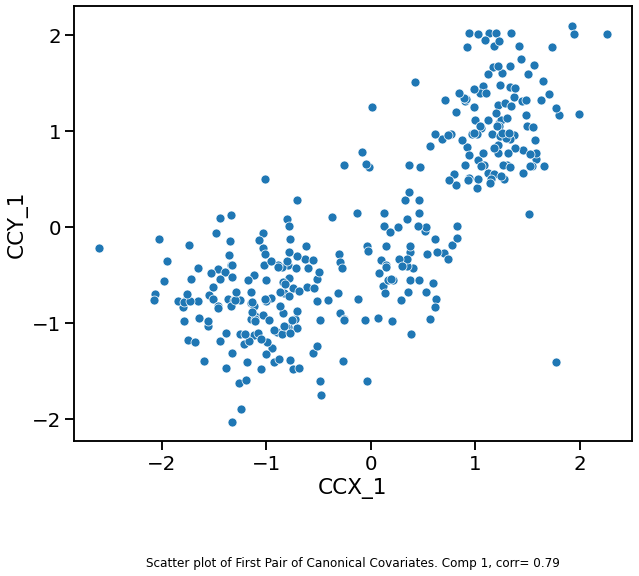

In [19]:
# To further understand the relationship between the pairs of canonical covariates, let us make scatter plot with the first pair of canonical covariates.
sns.set_context("talk", font_scale=1.2)
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_1",
                            y="CCY_1",
                            data=cc_res)
plt.title("Scatter plot of First Pair of Canonical Covariates. Comp 1, corr= %.2f"%
                np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1],y=-0.3,fontsize=12)

Here the CCY_1 is the $U_1$ and the CCX_1 is the $V_1$

#### Interpreting Canonical Covariates with Heatmap

In this toy example, we know already that the species variable in the dataset is a latent variable or hidden variable. Let us see how the latent variable is correlated with the first pair of canonical covariates. We first make a boxplot between the latent variable and each of the first pair of canonical covariates.

Text(0.5, -0.3, 'Boxplot of Canonical Correlate from X and Latent Variable')

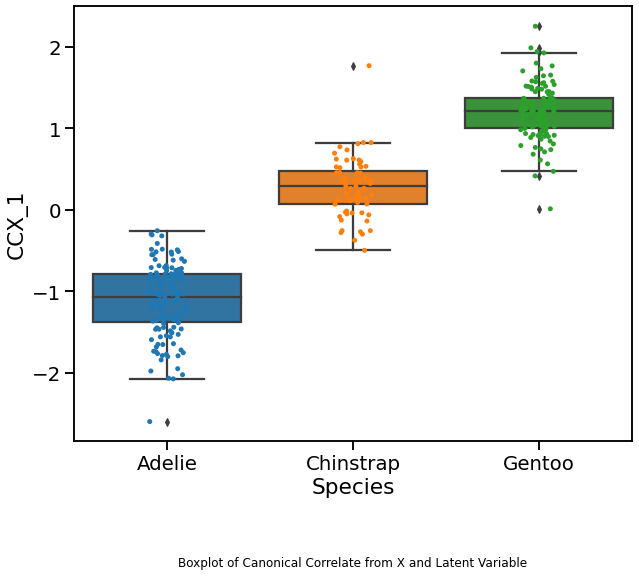

In [20]:
# Box plot and Strip plot
plt.figure(figsize=(10,8))
sns.boxplot(x="Species",
                        y= "CCX_1",
                        data=cc_res)

sns.stripplot(x="Species",
                        y="CCX_1",
                        data=cc_res)

plt.title("Boxplot of Canonical Correlate from X and Latent Variable",y=-0.3, fontsize=12)

Text(0.5, -0.3, 'Boxplot of Canonical Correlate from Y and Latent Variable')

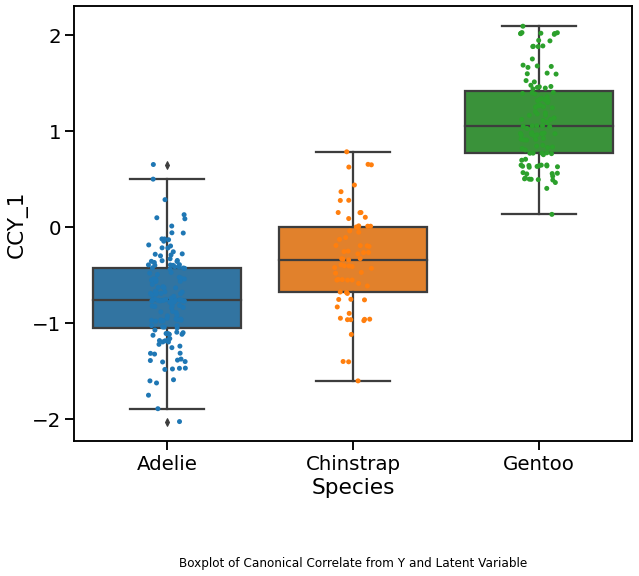

In [21]:
# Box plot and Strip plot
plt.figure(figsize=(10,8))
sns.boxplot(x="Species",
                        y= "CCY_1",
                        data=cc_res)

sns.stripplot(x="Species",
                        y="CCY_1",
                        data=cc_res)

plt.title("Boxplot of Canonical Correlate from Y and Latent Variable",y=-0.3, fontsize=12)

#### By coloring the scatterplots between the first pair of canonical covariates with the species variable and see how the canonical covariates have capture the underlying variable behind our datasets.

Text(0.5, 1.0, 'First Pair of Canonical Covariate, corr= 0.79')

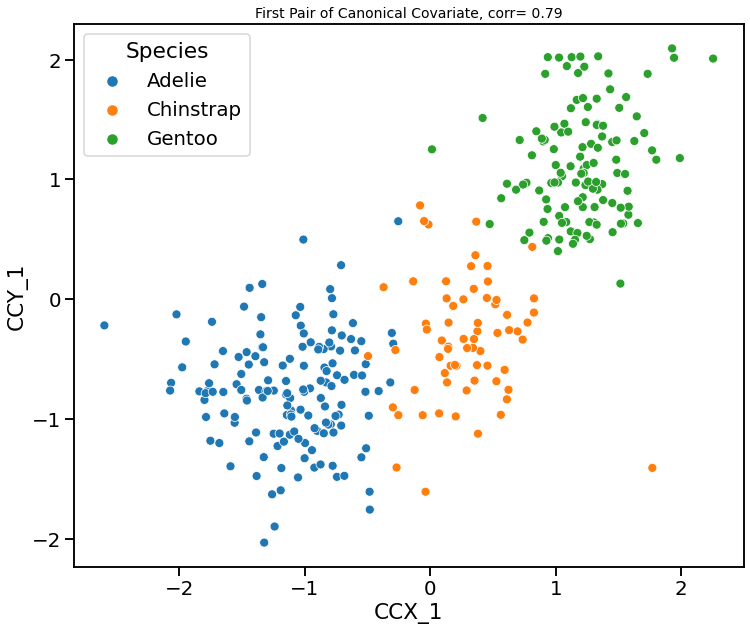

In [22]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="CCX_1",
                            y="CCY_1",
                            hue="Species", data=cc_res)
plt.title('First Pair of Canonical Covariate, corr= %.2f' % np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1], fontsize= 14)


### From the correlations between the first pair of canonical covariates and species variable in the data set, we can see that our Canonical Correlation Analysis has captured the shared variation between the two datasets. In this example the shared variation or the latent variable behind the first pair of canonical covariates is the species variable.

### By carefully looking at the association between CCs and a variable here the latent variable, we can definitely understand the results from our CCA results. Let us take a step further and make a heatmap of correlations between canonical covariates from each of the dataset against our input dataset including the meta data associated with it,

### Let us repeat ourselves by creating dataframe with original data and the canonical covariates from the first dataset X. To compute correlation, we convert the character variables into categorical variables and convert them to 0/1/2 codes.

In [23]:

pd.DataFrame({"Species": df.species.astype("category")}) #= pd.DataFrame(df.species)

,Species
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie
...,...
338,Gentoo
340,Gentoo
341,Gentoo
342,Gentoo


In [24]:
pd.DataFrame({"Species": df.species.astype("category").cat.codes}) #transfer!!!

,Species
0,0
1,0
2,0
4,0
5,0
...,...
338,2
340,2
341,2
342,2


In [25]:
# Rebulid a new dataframe category to 0-1 values
ccX_df = pd.DataFrame({
                  "CCX_1": X_c[:, 0],
                   "CCX_2": X_c[:, 1],
                    "Sepcies":df.species.astype('category').cat.codes,
                    "Island": df.island.astype('category').cat.codes,
                    "sex":df.sex.astype('category').cat.codes,
                    "bill_length":X_mc.bill_length_mm,
                    "bill_length":X_mc.bill_length_mm})
ccX_df.head()

,CCX_1,CCX_2,Sepcies,Island,sex,bill_length
0,-1.186252,4.773330e-16,0,2,1,-0.894695
1,-0.709573,-1.077909e-16,0,2,0,-0.821552
2,-0.790732,2.098492e-16,0,2,0,-0.675264
4,-1.718663,6.403287e-16,0,2,0,-1.333559
5,-1.772295,1.370432e-15,0,2,1,-0.858123


In [26]:
corr_X_df = ccX_df.corr(method='pearson') #{‘pearson’, ‘kendall’, ‘spearman’}
corr_X_df.head()

,CCX_1,CCX_2,Sepcies,Island,sex,bill_length
CCX_1,1.000000,-0.508051,0.935057,-0.561781,0.025383,0.828437
CCX_2,-0.508051,1.000000,-0.542860,0.482599,0.483908,0.061525
Sepcies,0.935057,-0.542860,1.000000,-0.622428,0.010964,0.730548
Island,-0.561781,0.482599,-0.622428,1.000000,-0.012435,-0.337179
sex,0.025383,0.483908,0.010964,-0.012435,1.000000,0.344078


In [27]:
# Let us make a heatmap with lower triangular correlation matrix. 

# To do that we subset the original correlational matrix with Numpy’s tril() function.
# plt.figure(figsize=(10,8))
# X_df_lt = corr_X_df.where(np.tril(np.ones(corr_X_df.shape)).astype(np.bool))

plt.figure(figsize=(10, 8))
X_df_lt = corr_X_df.where(np.tril(np.ones(corr_X_df.shape)).astype(np.bool8))
X_df_lt 

#compare corr_X_df
# pd.where(cond, other=nan, inplace=False, axis=None, level=None, errors='raise', try_cast=False, raise_on_error=None)[source]     Return an object of same shape as self and whose corresponding entries are from self where cond is True and otherwise are from other.

#  numpy.tril(m, k=0)
#     Lower triangle of an array.
#     Return a copy of an array with elements above the k-th diagonal zeroed.

,CCX_1,CCX_2,Sepcies,Island,sex,bill_length
CCX_1,1.000000,NaN,NaN,NaN,NaN,NaN
CCX_2,-0.508051,1.000000,NaN,NaN,NaN,NaN
Sepcies,0.935057,-0.542860,1.000000,NaN,NaN,NaN
Island,-0.561781,0.482599,-0.622428,1.000000,NaN,NaN
sex,0.025383,0.483908,0.010964,-0.012435,1.000000,NaN
bill_length,0.828437,0.061525,0.730548,-0.337179,0.344078,1.0


<Figure size 720x576 with 0 Axes>

Text(0.5, -0.1, 'Correlation Heatmap of Canonical Correlates from Data X and dataset')

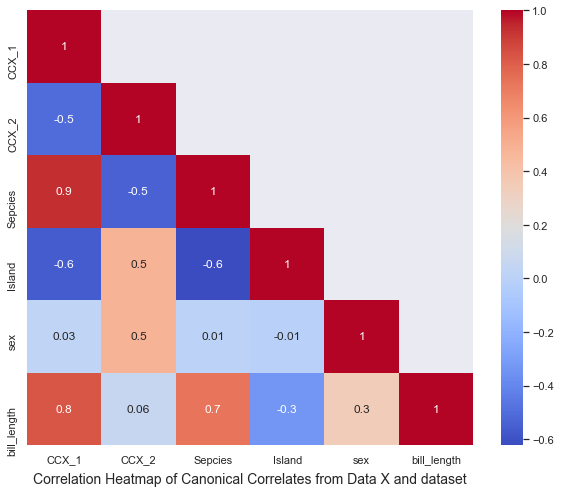

In [28]:
# let's plot
plt.figure(figsize=(10, 8)) #same figsize
sns.set(font_scale=1) #sns fontsize
sns.heatmap(X_df_lt,cmap="coolwarm", annot=True, fmt='.1g') #sns heatmap only
plt.savefig("heatmap_canonical_correlates_from_X_and_data.jpg",
                                format='jpeg',dpi=100)
plt.title("Correlation Heatmap of Canonical Correlates from Data X and dataset",y=-0.1, fontsize=14)

The heatmap showing correlations of the canonical covariates from the dataset X reveals a lot of interesting details. We can see that as expected there is nor correlation between the first and second canonical covariates from the dataset X. Note that the covariate is highly correlated to the two variables in the dataset X, positively with bill length and negatively with depth.

As we saw before, the first canonical co-variate is highly correlated with Species variable, the latent or hidden variable in this example. The first canonical covariate from X is also correlated with the other hidden variable, island, associated with the dataset. We can also see that the first canonical covariate is not correlated to sex variable. However, the second canonical covariate is correlated with sex variable moderately.

Text(0.5, -0.1, 'Correlation Heatmap of Canonical Correlates from Data Y and dataset')

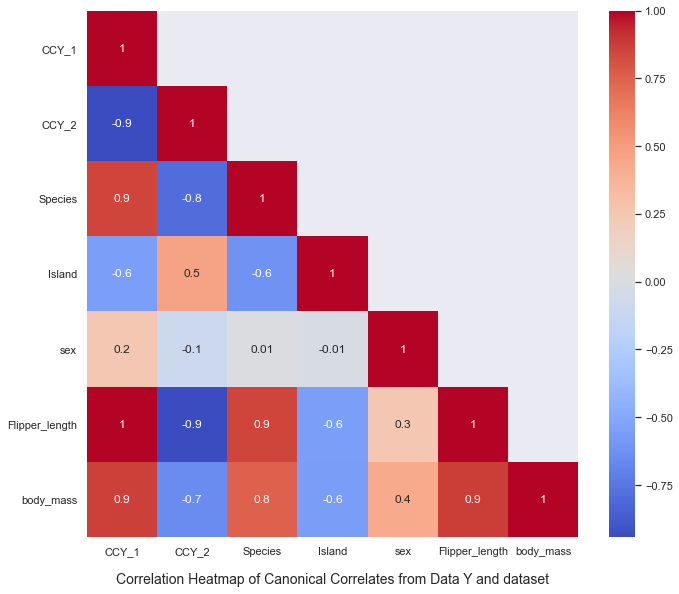

In [29]:
# Let us make a similar lower triangular correlation heatmap with the canonical covariates from Y dataset Y and the dataset Y itself including the meta data associated with it.
# second pair of canonical covariates with the dataset

ccY_df = pd.DataFrame({"CCY_1": Y_c[:, 0],
                                        "CCY_2": Y_c[:, 1],
                                        "Species": df.species.astype('category').cat.codes,
                                        "Island":df.island.astype('category').cat.codes,
                                        "sex": df.sex.astype('category').cat.codes,
                                        "Flipper_length": Y_mc.flipper_length_mm,
                                        "body_mass":Y_mc.body_mass_g})

#compute correlation
corr_Y_df = ccY_df.corr(method='pearson')

#get lower triangular correlation matrix
Y_df_lt = corr_Y_df.where(np.tril(np.ones(corr_Y_df.shape)).astype(np.bool8))

#make a lower triangular correlation heatmap with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(Y_df_lt,cmap="coolwarm", annot=True, fmt='.1g')
plt.tight_layout()
plt.savefig("Heatmap_Canonical_Correlates_from_Y_and_data.jpg",
                format='jpeg',dpi=100)
plt.title("Correlation Heatmap of Canonical Correlates from Data Y and dataset",y=-0.1, fontsize=14)

 ### Second pair of Canonical covariates Reveal a Second Latent Variable

The two heatmaps showing the correlations of canonical covariates and datasets show that sex is another variable that has an effect on both the datasets and CCA could capture that. To see the effect of sex, we can make a scatter plot with the second pair of canonical covariates and color it by sex variable.

Text(0.5, 1.0, 'Second pair of canonical covariate,corr = 0.40')

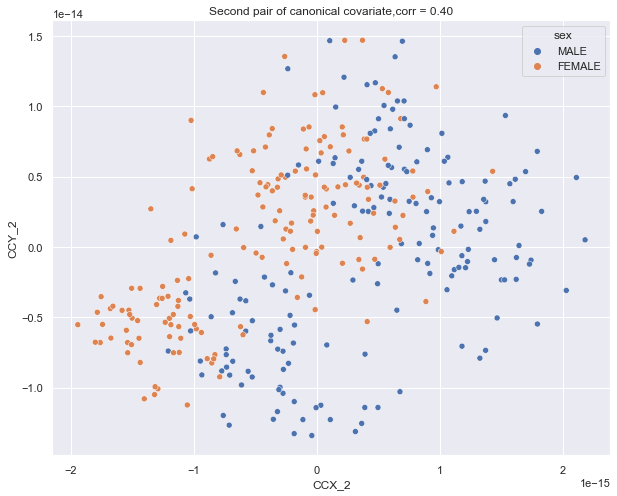

In [30]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="CCX_2",
                            y="CCY_2",
                            hue="sex",data=cc_res)
plt.title('Second pair of canonical covariate,corr = %.2f'%np.corrcoef(X_c[:, 1], Y_c[:,1])[0, 1])

## Summary of CCA Example in Python

Summarising what we saw so far, Canonical Correlation Analysis is a great toolkit to understand tow high dimensional datasets. As a toy example with Penguins data, the post showed how to perform CCA with Scikit-learn in Python. We also saw how to to interpret and understand pairs of canonical covariates obtained by looking at the two datasets at the same time.

In this post we did not get to the math or algorithm behind CCA, it will be fun to look at that in a future post. Also, Penguin dataset was perfect to illustrate CCA and it will be lot more fun to apply CCA to a more complex/realistic high dimensional datasets. Definitely great ideas for another few posts.